# **Initialization**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Filepath init
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

# **Exercise 1**

In [3]:
# Extracting the data and formatting the dataset
monthly_return = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
monthly_return_melted = monthly_return.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
monthly_return_melted.rename(columns={'NAME': 'Name'}, inplace=True)

In [4]:
# Extracting the country-region dataset and merging it to the previous one
static = pd.read_excel(filepath + 'Static.xlsx')
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')

In [5]:
# Filtering the rows of interest
df_ex1 = df_ex1[df_ex1['Region'] == 'PAC']
df_ex1 = df_ex1[(pd.to_datetime(df_ex1['year']) >= '2013-12-31') & (pd.to_datetime(df_ex1['year']) <= '2023-12-31')]

In [6]:
# Sorting to facilitate comprehension
df_ex1.sort_values(by=['Name', 'year'], inplace=True)

In [7]:
# New col with percentage change between two months
df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()

C:\Users\simon\AppData\Local\Temp\ipykernel_27756\1918207529.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()


In [8]:
# Dropping the 31.12.2013 rows (not included in our timeframe but necessary for the pct_change of 31.12.2014)
df_ex1.dropna(subset=['individual_monthly_return'], inplace=True)

In [9]:
# Filtering by non missing escores (2013-2024) complete dataset to allow comparisons
escore = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
melted_escore = escore.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="escore")
melted_escore.rename(columns={'NAME': 'Name'}, inplace=True)
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')
escore_interest = pd.merge(melted_escore, static, how='outer')
escore_interest = escore_interest[(escore_interest['year'] >= '2013-01-01') & (melted_escore['year'] <= '2024-12-31')]
escore_interest = escore_interest[escore_interest['Region'] == 'PAC']

In [10]:
filtered = escore_interest.groupby('ISIN')['escore'].count().reset_index()
filtered = filtered[filtered['escore'] == 11]

In [ ]:
interest_companies = filtered['ISIN'].tolist()

['AU000000ALL7',
 'AU000000AMP6',
 'AU000000ANN9',
 'AU000000ANZ3',
 'AU000000APA1',
 'AU000000ASX7',
 'AU000000BHP4',
 'AU000000BOQ8',
 'AU000000BPT9',
 'AU000000BSL0',
 'AU000000BWP3',
 'AU000000CBA7',
 'AU000000CGF5',
 'AU000000COH5',
 'AU000000CPU5',
 'AU000000CQR9',
 'AU000000CSL8',
 'AU000000CSR5',
 'AU000000CWY3',
 'AU000000DOW2',
 'AU000000DXS1',
 'AU000000ELD6',
 'AU000000GMG2',
 'AU000000GWA4',
 'AU000000HVN7',
 'AU000000IAG3',
 'AU000000IFL2',
 'AU000000IGO4',
 'AU000000ILU1',
 'AU000000IPL1',
 'AU000000IRE2',
 'AU000000JBH7',
 'AU000000LLC3',
 'AU000000MAH3',
 'AU000000MGR9',
 'AU000000MGX7',
 'AU000000MND5',
 'AU000000MQG1',
 'AU000000MTS0',
 'AU000000NAB4',
 'AU000000ORG5',
 'AU000000ORI1',
 'AU000000PPT9',
 'AU000000QAN2',
 'AU000000QBE9',
 'AU000000RHC8',
 'AU000000SEK6',
 'AU000000SGM7',
 'AU000000SGP0',
 'AU000000SHL7',
 'AU000000SIG5',
 'AU000000STO6',
 'AU000000SUN6',
 'AU000000SWM4',
 'AU000000SXL4',
 'AU000000TAH8',
 'AU000000TCL6',
 'AU000000TLS2',
 'AU000000WBC1

In [12]:
# Filtering df_ex1 to include only non missing escores
df_ex1 = df_ex1[df_ex1['ISIN'].isin(interest_companies)]

In [13]:
# Creation of the averaged returns and their std + merge
annualization_mean = df_ex1.groupby('Name')['individual_monthly_return'].mean()
annualization_mean = pd.DataFrame(annualization_mean)
annualization_mean.rename(columns={'individual_monthly_return': 'monthly_mean'}, inplace=True)

annualization_var = df_ex1.groupby('Name')['individual_monthly_return'].std()
annualization_var = pd.DataFrame(annualization_var)
annualization_var.rename(columns={'individual_monthly_return': 'monthly_std'}, inplace=True)

annualization = pd.merge(annualization_mean, annualization_var, on='Name', how='outer')

In [15]:
# Creation of annualized cols
annualization['annualized_mean'] = annualization['monthly_mean'] * 12
annualization['annualized_std'] = annualization['monthly_std'] * np.sqrt(12)

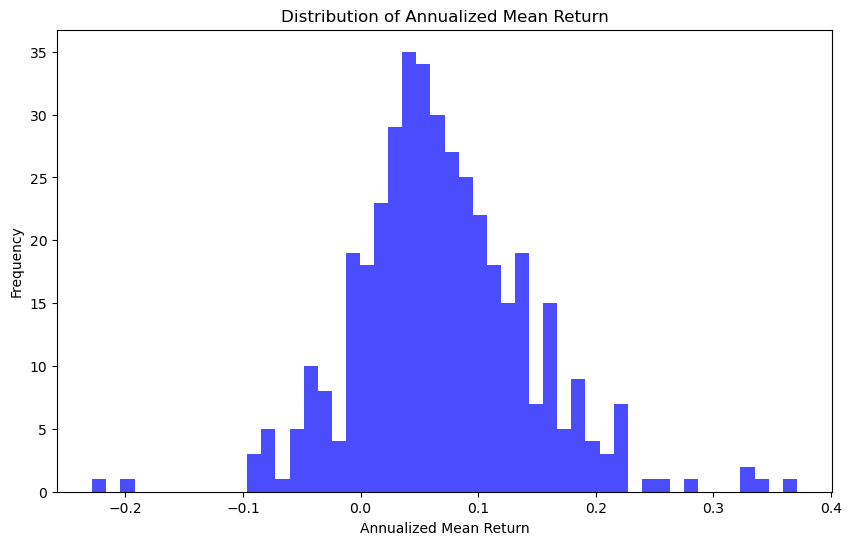

In [16]:
# Annualized mean histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_mean'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Mean Return')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Mean Return')
plt.show()

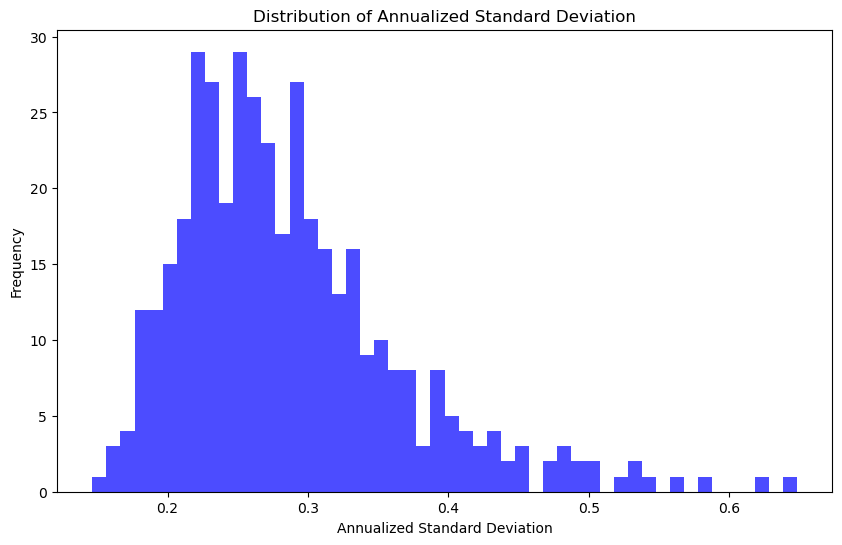

In [17]:
# Annualized std histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_std'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Standard Deviation')
plt.show()

In [18]:
# Variance-covariance matrix
np.corrcoef(annualization['annualized_mean'], annualization['annualized_std'])

array([[1.        , 0.10394675],
       [0.10394675, 1.        ]])

In [19]:
df_ex1.groupby('Name')['individual_monthly_return'].std()

Name
77 BANK                                 0.074258
A2B AUSTRALIA DEAD - DELIST.12/04/24    0.116616
ACOM                                    0.075747
ADVANTEST                               0.125831
AEON                                    0.062912
                                          ...   
YAMAHA                                  0.084032
YAMATO HDG.                             0.073987
YOKOGAWA ELECTRIC                       0.083193
YUE YUEN INDL.HDG.                      0.087788
YUEXIU PROPERTY COMPANY                 0.099185
Name: individual_monthly_return, Length: 409, dtype: float64

# **Exercise 2**

In [243]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [244]:
# Risk-free rates dataset
risk_free = pd.read_excel(filepath + 'Risk_Free_Rate.xlsx')
risk_free.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
risk_free['year'] = pd.to_datetime(risk_free['year'], format='%Y%m')

In [245]:
# Merging the datasets
df_ex2 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex2.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex2 = pd.merge(df_ex2, static, on=['Name', 'ISIN'], how='outer')

In [247]:
# Filter region and years of interest
df_ex2 = df_ex2[df_ex2['Region'] == 'PAC']
df_ex2 = df_ex2[(df_ex2['year'] >= '2013-12-31') & (df_ex2['year'] <= '2023-12-31')]
df_ex2['year'] = pd.to_datetime(df_ex2['year'])

In [248]:
# Filter same companies as in ex1 (non missing escores from 2013 to 2024)
df_ex2 = df_ex2[df_ex2['ISIN'].isin(interest_companies)]

In [230]:
df_ex2[df_ex2['monthly_return'].isna()]

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region
592512,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-09-29,NaN,0.0,JP,PAC
592513,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-10-31,NaN,0.0,JP,PAC
592514,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-11-30,NaN,0.0,JP,PAC
592515,SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23,JP3729000004,2023-12-29,NaN,0.0,JP,PAC
698819,TOSHIBA DEAD - DELIST.20/12/23,JP3592200004,2023-12-29,NaN,0.0,JP,PAC


In [262]:
monthly_return_melted[(monthly_return_melted['monthly_return']).isna() & (pd.to_datetime(monthly_return_melted['year']).dt.year >= 2014) & (pd.to_datetime(monthly_return_melted['year']).dt.year <= 2024) & (monthly_return_melted['ISIN'].isin(interest_companies))].sort_values(by=['Name', 'year'])['Name'].unique()

array(['A2B AUSTRALIA DEAD - DELIST.12/04/24',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
       'TOSHIBA DEAD - DELIST.20/12/23'], dtype=object)

In [222]:
# Returns percentage change and drop the 31.12.2013 rows
df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()
df_ex2.dropna(subset=['pct_monthly_return'], inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_27756\828368418.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()


In [27]:
# Building the equally weighted portfolio
ew_pf = df_ex2.groupby('year')['pct_monthly_return'].sum().reset_index()

In [28]:
# Dividing the return by the number of assets for each month
ew_pf['ew_m_ret'] = 0
for month in df_ex2['year'].unique():
    ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())

C:\Users\simon\AppData\Local\Temp\ipykernel_27756\48976642.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.03390904]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())


In [29]:
# Calculate the market value share
df_ex2['mv_share'] = df_ex2['monthly_market_value'] / df_ex2.groupby('year')['monthly_market_value'].transform('sum')

In [30]:
# Weight the returns by the market value share
df_ex2['mv_return'] = df_ex2['pct_monthly_return'] * df_ex2['mv_share']

In [31]:
# Market value weighted portfolio
mw_pf = df_ex2.groupby('year')['mv_return'].sum().reset_index()

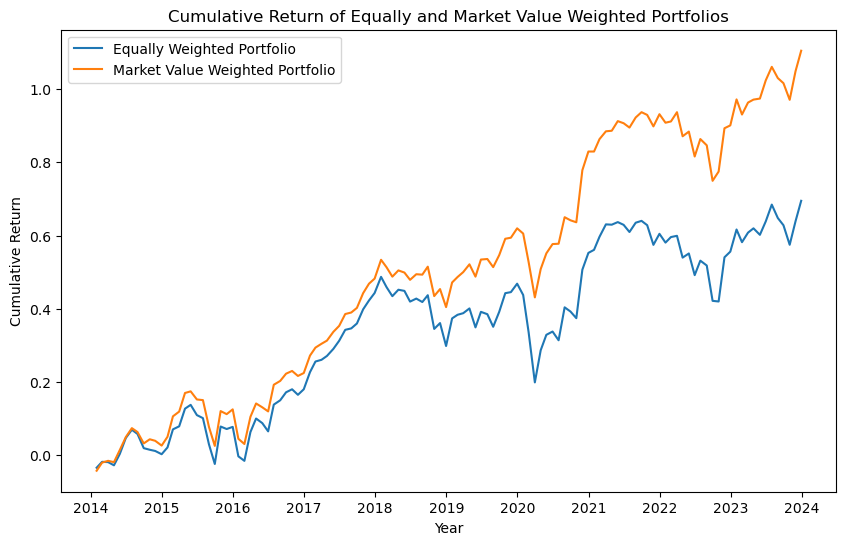

In [32]:
# Plot the monthly adapted returns for both portfolios
plt.figure(figsize=(10, 6))
plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), label='Equally Weighted Portfolio')
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), label='Market Value Weighted Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Equally and Market Value Weighted Portfolios')
plt.legend()
plt.show()

In [33]:
# Risk free rate in the given period 
risk_free = risk_free[(risk_free['year'] >= '2013-12-31') & (risk_free['year'] <= '2023-12-31')]
# Annualized risk free rate
ann_rf = risk_free['RF'].mean() * 12

In [34]:
# Statistics of interest Equally Weighted Portfolio
# Annualized return
ew_ann_ret = ew_pf['ew_m_ret'].mean() * 12
# Annualized std
ew_ann_std = ew_pf['ew_m_ret'].std() * np.sqrt(12)
# Sharpe ratio
ew_sharpe = (ew_ann_ret - ann_rf)/ ew_ann_std
#min return
ew_min_ret = ew_pf['ew_m_ret'].min()
#max return
ew_max_ret = ew_pf['ew_m_ret'].max()

# Statistics of interest Market Value Weighted Portfolio
# Annualized return
mw_ann_ret = mw_pf['mv_return'].mean() * 12
# Annualized std
mw_ann_std = mw_pf['mv_return'].std() * np.sqrt(12)
# Sharpe ratio
mw_sharpe = (mw_ann_ret - ann_rf)/ ew_ann_std
#min return
mw_min_ret = mw_pf['mv_return'].min()
#max return
mw_max_ret = mw_pf['mv_return'].max()


In [35]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069500,0.149409,-7.345591,-0.136916,0.132389
1,Market Value Weighted,0.110486,0.139963,-7.071273,-0.096959,0.142197


In [264]:
delisted = ['A2B AUSTRALIA DEAD - DELIST.12/04/24',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24',
       'CSR DEAD - DEAD.10/07/24', 'J S R DEAD - DELIST.25/06/24',
       'LAWSON DEAD - DELIST.24/07/24',
       'SBI SHINSEI BANKLIMITED DEAD - DELIST.28/09/23',
       'TOSHIBA DEAD - DELIST.20/12/23']

In [269]:
annualization = annualization.reset_index()

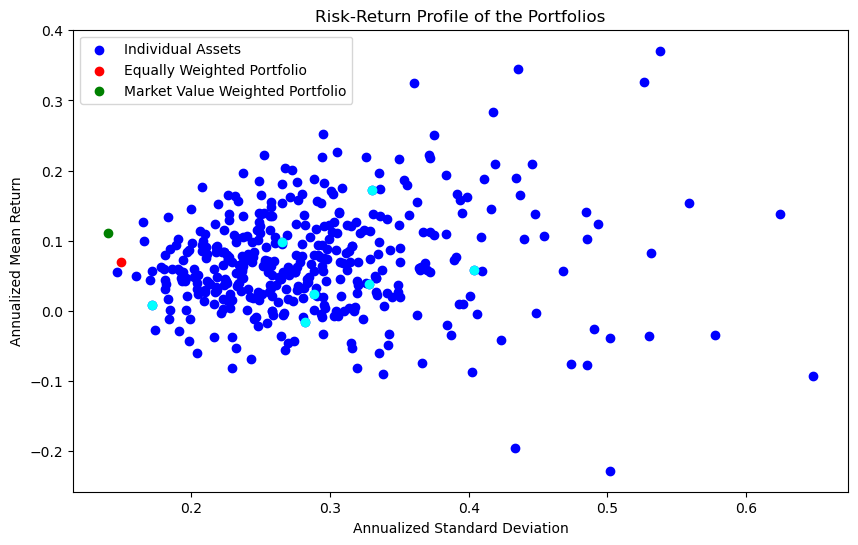

In [272]:
plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(annualization[annualization['Name'].isin(delisted)]['annualized_std'], annualization[annualization['Name'].isin(delisted)]['annualized_mean'], color='cyan')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

# **Exercise 3**

In [37]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')
# Merging the datasets
df_ex3 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex3.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex3 = pd.merge(df_ex3, static, on=['Name', 'ISIN'], how='outer')
# Filter region and years of interest
df_ex3 = df_ex3[df_ex3['Region'] == 'PAC']
df_ex3 = df_ex3[(df_ex3['year'] >= '2012-12-31') & (df_ex3['year'] <= '2023-12-31')]


In [38]:
# Filter df_ex3 to the same companies of interest as before (non missing escore from 2013 to 2024)
df_ex3 = df_ex3[df_ex3['ISIN'].isin(interest_companies)]

In [39]:
# Ensure the 'year' column in escore is datetime type
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')

# Merge the dataframes using merge_asof to align yearly escore data with monthly df_ex3 data
df_ex3 = pd.merge_asof(df_ex3.sort_values('year'), 
                                melted_escore.sort_values('year'), 
                                by=['Name', 'ISIN'], 
                                on='year', 
                                direction='backward')

In [40]:
# Returns percentage change and drop the 31.12.2012 rows
df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()
df_ex3.dropna(subset=['pct_monthly_return'], inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_27756\2875317152.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()


In [41]:
df_ex3.sort_values(by=['Name', 'year'], inplace=True)

In [42]:
df_ex3 = df_ex3[(df_ex3['year'].dt.year != 2013) & (df_ex3['year'].dt.year != 2012)]

In [ ]:
# Create the variance-covariance matrix for pct_monthly_return
cov_matrix = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

Name,77 BANK,A2B AUSTRALIA DEAD - DELIST.12/04/24,ACOM,ADVANTEST,AEON,AEON FINANCIAL SERVICE,AEON MALL,AGC,AISIN,AJINOMOTO,...,WHARF HOLDINGS,WOOLWORTHS GROUP,WORLEY,YAKULT HONSHA,YAMADA HOLDINGS,YAMAHA,YAMATO HDG.,YOKOGAWA ELECTRIC,YUE YUEN INDL.HDG.,YUEXIU PROPERTY COMPANY
Name,,,,,,,,,,,,,,,,,,,,,
77 BANK,0.005514,0.000911,0.001963,0.001448,0.001145,0.001355,0.001702,0.002039,0.002065,-0.000004,...,0.001108,0.000293,0.001999,0.000845,0.000737,0.000594,0.000615,0.000886,0.000735,0.001754
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.000911,0.013599,0.000353,0.003245,0.000478,0.002570,0.001409,0.002871,0.002910,0.000357,...,0.003288,0.002989,0.008111,-0.001331,0.000824,0.002050,0.001757,0.002662,0.003384,0.001836
ACOM,0.001963,0.000353,0.005738,0.000592,0.001622,0.002632,0.002127,0.001732,0.001493,-0.000009,...,0.000869,0.000302,0.002299,0.000748,0.000856,0.001983,0.000168,0.000246,0.001334,0.000325
ADVANTEST,0.001448,0.003245,0.000592,0.015833,0.000041,0.002248,0.000901,0.002722,0.002449,0.000736,...,0.000196,0.001645,0.005501,-0.000527,-0.000388,0.002248,0.001014,0.003908,0.001355,0.000255
AEON,0.001145,0.000478,0.001622,0.000041,0.003958,0.000997,0.001242,0.000816,0.000465,0.000789,...,0.000994,0.000289,0.001139,0.001489,0.000169,0.001254,0.000826,0.000528,0.000073,0.000466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAMAHA,0.000594,0.002050,0.001983,0.002248,0.001254,0.002660,0.001702,0.001734,0.002156,0.000006,...,0.001321,0.000575,0.004259,0.000921,0.001242,0.007061,0.001305,0.001784,0.002035,0.001490
YAMATO HDG.,0.000615,0.001757,0.000168,0.001014,0.000826,0.000678,0.000842,0.001207,0.001191,0.000897,...,0.000284,0.000966,0.001352,0.001629,0.000812,0.001305,0.005474,0.000634,0.001157,0.000894
YOKOGAWA ELECTRIC,0.000886,0.002662,0.000246,0.003908,0.000528,0.002121,0.001054,0.001968,0.002401,0.000598,...,0.000692,0.001312,0.005239,0.000241,0.000814,0.001784,0.000634,0.006921,0.001865,0.000682


In [45]:
from scipy.optimize import minimize

In [46]:
# Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

In [47]:
# Number of assets
num_assets = len(cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
min_variance_weights = result.x

# Display the optimal weights
#min_variance_weights

In [48]:
minvar_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
minvar_pf['minvar_w'] = min_variance_weights
minvar_pf['annualized_mean'] = minvar_pf['pct_monthly_return'] * 12
minvar_pf['annualized_std'] = minvar_pf['pct_monthly_return'].std() * np.sqrt(12)
# Annualized mean
minvar_ann_ret = (minvar_pf['annualized_mean'] * minvar_pf['minvar_w']).sum()
# Annualized std
minvar_ann_std = minvar_pf['annualized_std'].std() * np.sqrt(12)

In [49]:
# Objective function: negative portfolio return (to maximize return)
def portfolio_return(weights, returns):
    return -np.dot(weights, returns)

# Mean returns of the assets
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values

# Minimize the negative portfolio return
result_max_return = minimize(portfolio_return, init_guess, args=(mean_returns,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for maximum return portfolio
max_return_weights = result_max_return.x

# Display the optimal weights
# max_return_weights

In [50]:
# Calculate the annualized return of the minimum variance portfolio
minvar_ann_ret = np.sum(min_variance_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
minvar_ann_std = np.sqrt(np.dot(min_variance_weights.T, np.dot(cov_matrix * 12, min_variance_weights)))

# Calculate the annualized return of the minimum variance portfolio
maxr_ann_ret = np.sum(max_return_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
maxr_ann_std = np.sqrt(np.dot(max_return_weights.T, np.dot(cov_matrix * 12, max_return_weights)))


In [51]:
# Compute the efficient frontier portofolios
target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 10)
efficient_frontier = []
for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier.append(result.x)

In [52]:
# Calculate the annualized return and standard deviation for each set of weights in the efficient frontier
target_ann_ret = []
target_ann_std = []

for weights in efficient_frontier:
	ann_ret = np.sum(weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12
	ann_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))
	target_ann_ret.append(ann_ret)
	target_ann_std.append(ann_std)

# Convert lists to numpy arrays
target_ann_ret = np.array(target_ann_ret)
target_ann_std = np.array(target_ann_std)

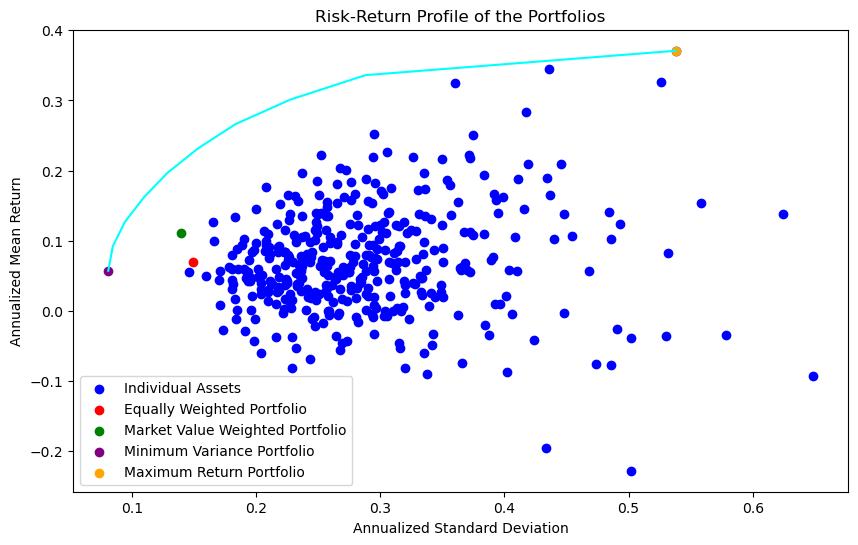

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance Portfolio')
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return Portfolio')
plt.plot(target_ann_std, target_ann_ret, color='cyan')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

# **Exercise 4**

In [124]:
# Setting df for ex 4 with the same companies as before
df_ex4 = pd.merge(monthly_return_melted, static, how='outer')
df_ex4 = df_ex4[df_ex4['Region'] == 'PAC']
df_ex4 = df_ex4[df_ex4['ISIN'].isin(interest_companies)]
df_ex4['year'] = pd.to_datetime(df_ex4['year'])

In [125]:
# Filling the missings with the previous available value
df_ex4['monthly_return'].fillna(method='ffill', inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_27756\863388159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ex4['monthly_return'].fillna(method='ffill', inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_27756\863388159.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ex4['monthly_return'].fillna(method='ffill', inplace=True)


In [126]:
# Computing the individual returns
df_ex4['pct_monthly_return'] = df_ex4.groupby('Name')['monthly_return'].pct_change()

In [127]:
# Filtering by the interesting timeframe
df_ex4 = df_ex4[(df_ex4['year'] >= '2003-12-01') & (df_ex4['year'] <= '2024-12-31')]

In [128]:
# Drop December 2003
df_ex4 = df_ex4[df_ex4['year'] >= '2004-01-01']

In [129]:
# Initial pf comutuation (2004-2013)
df_ex4_initial = df_ex4[df_ex4['year'] <= '2014-01-01']

In [ ]:
# Variance-covariance initial matrix
initial_cov_matrix = df_ex4_initial.pivot(index='year', columns='Name', values='pct_monthly_return').cov()

Name,77 BANK,A2B AUSTRALIA DEAD - DELIST.12/04/24,ACOM,ADVANTEST,AEON,AEON FINANCIAL SERVICE,AEON MALL,AGC,AISIN,AJINOMOTO,...,WHARF HOLDINGS,WOOLWORTHS GROUP,WORLEY,YAKULT HONSHA,YAMADA HOLDINGS,YAMAHA,YAMATO HDG.,YOKOGAWA ELECTRIC,YUE YUEN INDL.HDG.,YUEXIU PROPERTY COMPANY
Name,,,,,,,,,,,,,,,,,,,,,
77 BANK,0.005778,0.000960,0.002724,0.000855,0.003019,0.003074,0.003016,0.002989,0.001532,0.001219,...,0.000761,0.000899,0.002067,0.001694,0.002828,0.001707,0.002242,0.001674,0.000125,0.000485
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.000960,0.009663,0.001485,0.003150,0.002488,0.002351,0.002818,0.002053,0.002582,0.000655,...,0.003848,0.003160,0.004645,0.001621,0.003920,0.002630,0.001394,0.002759,0.002653,0.005499
ACOM,0.002724,0.001485,0.018382,0.001158,0.002868,0.005871,0.003714,0.003721,0.000471,0.001161,...,0.000535,-0.000217,-0.000604,0.002442,0.002919,0.001771,0.001879,0.002215,-0.000460,-0.001929
ADVANTEST,0.000855,0.003150,0.001158,0.012356,0.003025,0.001026,0.003358,0.004349,0.003880,0.001972,...,0.004393,0.002388,0.005523,0.001511,0.005404,0.004009,0.001382,0.005841,0.003703,0.005660
AEON,0.003019,0.002488,0.002868,0.003025,0.006761,0.004637,0.004124,0.003646,0.001528,0.001214,...,0.001905,0.001290,0.001930,0.000788,0.004881,0.002351,0.002458,0.003740,0.001181,0.002966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAMAHA,0.001707,0.002630,0.001771,0.004009,0.002351,0.002022,0.003307,0.003267,0.003235,0.001419,...,0.003431,0.001715,0.004802,0.002173,0.003310,0.007144,0.001190,0.004178,0.002331,0.002049
YAMATO HDG.,0.002242,0.001394,0.001879,0.001382,0.002458,0.002600,0.002128,0.001583,0.001953,0.001799,...,0.001572,0.000939,0.001292,0.000519,0.002810,0.001190,0.004912,0.003486,-0.000175,0.000725
YOKOGAWA ELECTRIC,0.001674,0.002759,0.002215,0.005841,0.003740,0.002569,0.003524,0.003947,0.003494,0.003077,...,0.004830,0.002247,0.004094,0.001933,0.005057,0.004178,0.003486,0.011226,0.001875,0.005299


In [131]:
# Number of assets
num_assets = len(initial_cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
initial_pf = minimize(portfolio_variance, init_guess, args=(initial_cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
initial_weights = initial_pf.x

# Display the optimal weights
#min_variance_weights

In [132]:
# Calculate the annualized return of the minimum variance portfolio
initial_ann_ret = np.sum(initial_weights * df_ex4_initial.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
initial_ann_std = np.sqrt(np.dot(initial_weights.T, np.dot(initial_cov_matrix * 12, initial_weights)))

In [133]:
# First reallocation (2004-2013 + 2014)
df_ex4_2014 = df_ex4[df_ex4['year'] <= '2015-01-01']

In [134]:
# Variance-covariance 2014 matrix
cov_matrix_2014 = df_ex4_2014.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
cov_matrix_2014

Name,77 BANK,A2B AUSTRALIA DEAD - DELIST.12/04/24,ACOM,ADVANTEST,AEON,AEON FINANCIAL SERVICE,AEON MALL,AGC,AISIN,AJINOMOTO,...,WHARF HOLDINGS,WOOLWORTHS GROUP,WORLEY,YAKULT HONSHA,YAMADA HOLDINGS,YAMAHA,YAMATO HDG.,YOKOGAWA ELECTRIC,YUE YUEN INDL.HDG.,YUEXIU PROPERTY COMPANY
Name,,,,,,,,,,,,,,,,,,,,,
77 BANK,0.005436,0.000861,0.002802,0.000839,0.002782,0.002785,0.002813,0.002812,0.001467,0.001126,...,0.000728,0.000832,0.001933,0.001561,0.002549,0.001640,0.002047,0.001507,0.000223,0.000436
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.000861,0.009534,0.001119,0.002888,0.002189,0.002191,0.002404,0.001815,0.002247,0.000653,...,0.003640,0.003091,0.004499,0.001475,0.003227,0.002186,0.001193,0.002444,0.002243,0.005213
ACOM,0.002802,0.001119,0.017955,0.001433,0.002865,0.005651,0.003709,0.003777,0.000841,0.000973,...,0.000537,-0.000142,-0.000144,0.002215,0.002713,0.001908,0.001604,0.002004,-0.000086,-0.001826
ADVANTEST,0.000839,0.002888,0.001433,0.011719,0.002834,0.001124,0.002988,0.004086,0.003773,0.001751,...,0.003927,0.001923,0.004941,0.001297,0.004687,0.003680,0.000952,0.005277,0.003424,0.005066
AEON,0.002782,0.002189,0.002865,0.002834,0.006365,0.004472,0.003982,0.003352,0.001515,0.001126,...,0.001868,0.001177,0.001924,0.000700,0.004499,0.002368,0.002229,0.003221,0.001119,0.002777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAMAHA,0.001640,0.002186,0.001908,0.003680,0.002368,0.002020,0.003194,0.002984,0.003158,0.001317,...,0.003285,0.001456,0.004296,0.001919,0.003203,0.007002,0.001243,0.003505,0.002263,0.002086
YAMATO HDG.,0.002047,0.001193,0.001604,0.000952,0.002229,0.002338,0.001968,0.001339,0.001753,0.001671,...,0.001430,0.000946,0.001088,0.000499,0.002731,0.001243,0.004887,0.003231,-0.000015,0.000851
YOKOGAWA ELECTRIC,0.001507,0.002444,0.002004,0.005277,0.003221,0.002150,0.003181,0.003743,0.003214,0.002686,...,0.004193,0.002047,0.003820,0.001740,0.004439,0.003505,0.003231,0.010928,0.001860,0.004837


In [135]:
# Number of assets
num_assets = len(cov_matrix_2014)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Minimize the portfolio variance
pf_2014 = minimize(portfolio_variance, init_guess, args=(cov_matrix_2014,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
weights_2014 = pf_2014.x

# Display the optimal weights
#min_variance_weights

In [136]:
weights = []

for time in ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']:
    actual_timeframe = df_ex4[df_ex4['year'] <= f'{time}-01-01']
    cov_matrix = actual_timeframe.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
    num_assets = len(cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    init_guess = num_assets * [1. / num_assets]
    pf = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    weights.append(pf.x)



In [176]:
final_df = pd.DataFrame()

for year in [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]:
    actual_timeframe = df_ex4[df_ex4['year'].dt.year == year]
    names = pd.DataFrame(actual_timeframe['Name'].unique(), columns=['Name'])
    names['weight'] = weights[year-2014]
    merged = pd.merge(actual_timeframe, names, on='Name', how='outer')
    final_df = pd.concat([final_df, merged])


In [187]:
final_df['weighted_returns'] = final_df['pct_monthly_return'] * final_df['weight']

In [196]:
reb_pf = final_df.groupby('year')['weighted_returns'].sum().reset_index()
reb_pf

,year,weighted_returns
0,2014-01-31,-0.030695
1,2014-02-28,0.042460
2,2014-03-31,0.005565
3,2014-04-30,-0.005801
4,2014-05-30,0.030289
...,...,...
127,2024-08-30,0.044653
128,2024-09-30,0.002643
129,2024-10-31,-0.006781
130,2024-11-29,0.001976


In [197]:
# Statistics of interest Rebalanced Portfolio
# Annualized return
reb_ann_ret = reb_pf['weighted_returns'].mean() * 12
# Annualized std
reb_ann_std = reb_pf['weighted_returns'].std() * np.sqrt(12)
# Sharpe ratio
reb_sharpe = (reb_ann_ret - ann_rf)/ reb_ann_std
#min return
reb_min_ret = reb_pf['weighted_returns'].min()
#max return
reb_max_ret = reb_pf['weighted_returns'].max()


In [215]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted', 'Yearly Rebalanced'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret, reb_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std, reb_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe, reb_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret, reb_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret, reb_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.069500,0.149409,-7.345591,-0.136916,0.132389
1,Market Value Weighted,0.110486,0.139963,-7.071273,-0.096959,0.142197
2,Yearly Rebalanced,0.057683,0.112269,-9.880893,-0.095110,0.101403


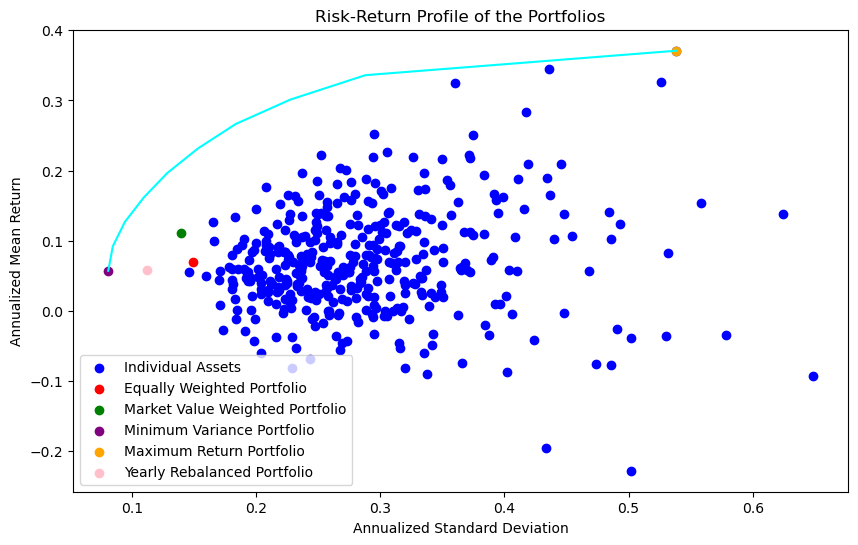

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(target_ann_std, target_ann_ret, color='cyan')
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance Portfolio')
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return Portfolio')
plt.scatter(reb_ann_std, reb_ann_ret, color='pink', label='Yearly Rebalanced Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

In [206]:
df_ex4['Name'].unique()

array(['77 BANK', 'A2B AUSTRALIA DEAD - DELIST.12/04/24', 'ACOM',
       'ADVANTEST', 'AEON', 'AEON FINANCIAL SERVICE', 'AEON MALL', 'AGC',
       'AISIN', 'AJINOMOTO', 'ALFRESA HOLDINGS', 'ALPS ALPINE', 'AMADA',
       'AMP', 'ANA HOLDINGS', 'ANSELL', 'ANZ GROUP HOLDINGS',
       'AOZORA BANK', 'APA GROUP', 'ARISTOCRAT LEISURE',
       'ASAHI GROUP HOLDINGS', 'ASAHI KASEI', 'ASTELLAS PHARMA', 'ASX',
       'AUCKLAND INTL.AIRPORT', 'BANDAI NAMCO HDG.', 'BANK OF EAST ASIA',
       'BANK OF QLND.', 'BEACH ENERGY', 'BEIJING ENTERPRISES HOLDINGS',
       'BENESSE HOLDINGS DEAD - DELIST.17/05/24', 'BHP GROUP',
       'BLUESCOPE STEEL', 'BOC HONG KONG HOLDINGS', 'BRIDGESTONE',
       'BROTHER INDUSTRIES', 'BWP TRUST', 'CANON',
       'CANON MARKETING JAPAN', 'CAPITALAND ASCENDAS REIT',
       'CAPITALAND INTEG. COML. TST.', 'CASIO COMPUTER', 'CENTRAL GLASS',
       'CENTRAL JAPAN RAILWAY', 'CHALLENGER', 'CHARTER HALL RETAIL REIT',
       'CHIBA BANK', 'CHINA EVERBRIGHT', 'CHINA MENGNIU DAIRY

In [207]:
import seaborn as sns

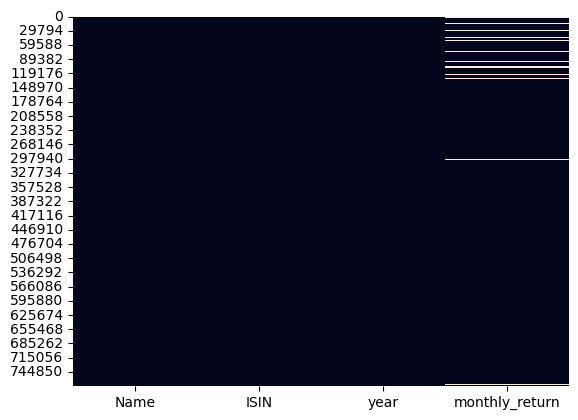

In [214]:
plt.figure()

sns.heatmap(monthly_return_melted.isnull(), cbar=False)
plt.show()